In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df_multi_df_list_p = {}
df_multi_df_list_n = {}

file_path = '../thesis_data/arne_03_05/logs_arne_real_03_05_tt1'
graph_file = "graph/arne_real_03_05_tt1_eye.json"
# file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3'
# graph_file = "graph/arne_imag_03_05_tt3_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_real_01'
# graph_file = "graph/ly_real_01_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_real_02'
# graph_file = "graph/ly_real_02_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_imag_01'
# graph_file = "graph/ly_imag_01_eye.json"
# file_path = '../thesis_data/ly_04_07/logs_ly_imag_03'
# graph_file = "graph/ly_imag_03_eye.json"
# file_path = '../thesis_data/ece_04_07/logs_ece_real_02'
# graph_file = "graph/ece_real_02_eye.json"
# file_path = '../thesis_data/qiang_23_07/logs_qiang_real_01'
# graph_file = "graph/qiang_real_01_eye.json"
# file_path = '../thesis_data/qiang_23_07/logs_qiang_imag_01'
# graph_file = "graph/qiang_imag_01_eye.json"

for m in range(2,11):
    ignore_events_threshold = m*0.2
    df_list_p = []
    df_list_n = []
    for i in range(1,26):
        # Read the CSV file into a DataFrame
#         file_path = '../thesis_data/arne_03_05/logs_arne_real_03_05_tt1/log'+str(i)+'.txt'
#         file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_02/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_03/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ece_04_07/logs_ece_real_02/log'+str(i)+'.txt'

        file_full_path = file_path+'/log'+str(i)+'.txt'
        df = pd.read_csv(file_full_path, sep='\t')

        # Column to check for changes
        column_to_check = 'Gazing'

        # Filter rows where the column value changes
        df_filtered = df[df[column_to_check] != df[column_to_check].shift()].copy()

        print("\nFiltered DataFrame:")
        print(df_filtered)
        def is_integer_trial(row):
            try:
                int_value = int(row['Trial'])
                return True
            except ValueError:
                return False

        df_filtered['gazing_time'] = df_filtered['Time'].shift(-1) - df_filtered['Time']
        df_filtered_2 = df_filtered[df_filtered.apply(lambda row: is_integer_trial(row),axis=1)].copy()
        df_filtered_3 = df_filtered_2[df_filtered_2['Gazing']!='0'].copy()
        df_filtered_4 = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])>=0.2,axis=1)].copy()
        df_filtered_final_p = df_filtered_4[df_filtered_4.apply(lambda row: float(row['gazing_time'])>=ignore_events_threshold,axis=1)].copy()
        df_filtered_final_n = df_filtered_4[df_filtered_4.apply(lambda row: float(row['gazing_time'])<ignore_events_threshold,axis=1)].copy()


        df_list_p.append(df_filtered_final_p)
        df_list_n.append(df_filtered_final_n)
        
    df_multi_df_list_p[str(ignore_events_threshold)]=df_list_p
    df_multi_df_list_n[str(ignore_events_threshold)]=df_list_n



Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0    61.346237                   xx                   xx    xx     xx     xx
1    62.571532   341.84675216674805   -836.8520450592041     1     12      0
21   64.254691   -26.72321319580078   -421.0069878101349     1     12      3
23   64.398898   -149.2312717437744  -327.70697486400604     1     12      0
24   64.468367    -218.147234916687   -267.3366050720215     1     12      1
33   65.121226   -418.7789497375488  -234.14445519447327     1     12      0
36   65.347270   -495.2912063598633   -74.17331886291504     1     12     12
37   65.423293  -481.05418968200684   -4.099972128868103     1     12      0
38   65.497858  -395.44973945617676    68.49234545230865     1     12      4
41   65.712459   -72.16455745697021   217.44010484218597     1     12      9
43   65.862649   155.46614742279053   150.91599655151367     1     12      0
44   65.937982    269.8264446258545   129.6767860651016


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0    90.157966                   xx                   xx    xx     xx     xx
1    90.164027   -87.80205345153809    290.9680359363556     4     16      0
3    90.298916   -61.21679878234863   234.95446246862411     4     16      9
18   91.329883   122.83602905273438    10.13163846731186     4     16      0
24   91.747759    91.93163681030273    -322.552508354187     4     16     12
27   91.983471  -164.19756889343262  -349.31508779525757     4     16      0
28   92.063339  -254.52924728393555   -349.7493417263031     4     16      6
32   92.364714    -426.522554397583  -363.58531737327576     4     16      0
41   92.989967   -552.5497051477432   -35.25473374128342     4     16      5
42   93.059955   -567.3256698846817   16.190413892269135     4     16      0
43   93.127409   -581.8277117013931    74.72608190774918     4     16      7
49   93.545003   -470.2875562906265    159.669926941394


Filtered DataFrame:
         Time               GazeX                GazeY Trial Target Gazing
0   82.768293                  xx                   xx    xx     xx     xx
1   82.774910   87.25861358642578    270.8546065092087     3     11      0
2   82.840362   81.39468383789062   250.19555139541626     3     11      2
17  83.931469  -134.6222105026245   159.62235367298126     3     11      0
19  84.084453  -222.3898401260376      95.564990401268     3     11      1
21  84.227598  -326.9528703689575    4.679396867752075     3     11     15
23  84.357363  -459.4678144454956  -61.847086787223816     3     11      0
33  85.029703  -491.0514965057373   -82.17996382713318     3     11     12
39  85.442612  -564.7357206344604   13.028834581375122     3     11      0
41  85.593507  -594.2606763839722    37.98217821121216     3     11     11
42  85.666834  -603.0176553726196    34.31060528755188     3     11      0
43  85.741851  -617.3066883087158    48.73290002346039     3     11     11
72  


Filtered DataFrame:
         Time               GazeX               GazeY Trial Target Gazing
0   73.983298                  xx                  xx    xx     xx     xx
1   73.989074  -66.13815307617188    284.266804933548     2      2      0
3   74.121479  3.4697914123535156    254.095072388649     2      2      6
7   74.392780   120.6071548461914  199.93069750070572     2      2      0
12  74.747852  208.84107971191406  216.30856722593307     2      2      2
19  75.287097  421.71253967285156   83.02162170410156     2      2      0
25  75.746038   369.6204643249512   38.71734380722046     2      2      2
26  75.814766   341.9260597229004   28.81811285018921     2      2      0
29  76.030500   324.2494583129883   45.64841866493225     2      2      2
41  76.910805  287.11436462402344    25.7378511428833     2      2      0
45  77.196550   296.6846351623535   4.803057432174683     2      2      1
53  77.764097   306.8191108703613  20.916280031204224     2      2      0
56  77.995714  31


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   344.624285                   xx                   xx    xx     xx     xx
1   344.635355   119.40780258178711    316.6987030506134    25      8      0
11  345.420510   206.71009826660156   206.58009374141693    25      8     16
15  345.719369    330.5530471801758    18.70469355583191    25      8      0
16  345.790105    337.1180419921875   -35.11451804637909    25      8     13
23  346.398694   420.19287872314453   -69.19662487506866    25      8      0
26  346.626669    535.8757667541504    84.76762068271637    25      8      3
29  346.839225    462.9562797546387   117.27032750844955    25      8      0
30  346.909294   364.38659477233887    84.96386986970901    25      8     16
32  347.064628   173.80904960632324   1.6637930274009705    25      8      0
33  347.135867    72.32360458374023   -47.06684106588364    25      8      2
35  347.277128  -141.39830017089844   -173.457751572132

In [3]:
def print_object_attributes(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f"{key}: {value}")
    else:
        for attr in dir(obj):
            if not attr.startswith('__') and not attr.endswith('__'):
                value = getattr(obj, attr)
                print(f"{attr}: {value}")

print_object_attributes(df_multi_df_list_p)

0.4: [         Time               GazeX                GazeY Trial Target Gazing  \
24  64.468367   -218.147234916687   -267.3366050720215     1     12      1   
73  68.074641  -707.4714760780334   -85.38671851158142     1     12     12   
90  69.234092   -637.996973991394  -192.26637053489685     1     12     12   

    gazing_time  
24     0.652860  
73     1.090730  
90     2.127005  ,          Time               GazeX               GazeY Trial Target Gazing  \
12  74.747852  208.84107971191406  216.30856722593307     2      2      2   
29  76.030500   324.2494583129883   45.64841866493225     2      2      2   
45  77.196550   296.6846351623535   4.803057432174683     2      2      1   
56  77.995714  312.30671310424805    49.0748108625412     2      2      2   

    gazing_time  
12     0.539244  
29     0.880305  
45     0.567547  
56     2.069852  ,          Time               GazeX               GazeY Trial Target Gazing  \
2   82.840362   81.39468383789062  250.19555139541626 

1.4000000000000001: [         Time              GazeX                GazeY Trial Target Gazing  \
90  69.234092  -637.996973991394  -192.26637053489685     1     12     12   

    gazing_time  
90     2.127005  ,          Time               GazeX             GazeY Trial Target Gazing  \
56  77.995714  312.30671310424805  49.0748108625412     2      2      2   

    gazing_time  
56     2.069852  ,          Time               GazeX              GazeY Trial Target Gazing  \
43  85.741851  -617.3066883087158  48.73290002346039     3     11     11   

    gazing_time  
43     2.091595  ,          Time             GazeX              GazeY Trial Target Gazing  \
85  96.165267  607.188777923584  48.65381455421448     4     16     16   

    gazing_time  
85     2.083659  ,           Time               GazeX              GazeY Trial Target Gazing  \
62  105.346294  -575.2213253974915  40.05524039268494     5     15     15   

    gazing_time  
62     2.068849  ,           Time              Gaz

In [4]:
def count_p(df_list_p):
    count_true_positive = 0
    count_false_positive = 0
    for df in df_list_p:
        c_tp = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        c_fp = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        count_true_positive+= c_tp
        count_false_positive+= c_fp
    return count_true_positive,count_false_positive

def count_n(df_list_n):
    count_true_negative = 0
    count_false_negative = 0
    for df in df_list_n:
        c_tn = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        c_fn = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        count_true_negative+= c_tn
        count_false_negative+= c_fn
    return count_true_negative,count_false_negative

data_for_graph = {
    "Dwelltime":[],
    "count_true_positive":[],
    "count_false_positive":[],
    "count_true_negative":[],
    "count_false_negative":[],
    "sum_true_pos":[],
    "sum_false_pos":[],
    "sum_true_neg":[],
    "sum_false_neg":[]
    
}
for m in range(2,11):
    ignore_events_threshold = m*0.2
    count_true_positive,count_false_positive = count_p(df_multi_df_list_p[str(ignore_events_threshold)])
    count_true_negative,count_false_negative = count_n(df_multi_df_list_n[str(ignore_events_threshold)])
    data_for_graph["Dwelltime"].append(str(round(ignore_events_threshold,2)))
    if(count_true_positive==0): # positive precision
        data_for_graph["count_true_positive"].append(0)
    else:
        data_for_graph["count_true_positive"].append((count_true_positive/(count_true_positive+count_false_positive)))
        
        
    if(count_true_positive==0):
        data_for_graph["count_false_positive"].append(0)
    else:
        data_for_graph["count_false_positive"].append((count_true_positive/(count_true_positive+count_false_negative)))
        
        
    if(count_true_negative==0): # negative precision
        data_for_graph["count_true_negative"].append(0)
    else:
        data_for_graph["count_true_negative"].append((count_true_negative/(count_true_negative+count_false_negative)))
        
        
    if(count_true_negative==0):
        data_for_graph["count_false_negative"].append(0)
    else:
        data_for_graph["count_false_negative"].append((count_true_negative/(count_true_negative+count_false_positive)))
    
    data_for_graph["sum_true_pos"].append(count_true_positive) 
    data_for_graph["sum_false_pos"].append(count_false_positive) 
    data_for_graph["sum_true_neg"].append(count_true_negative) 
    data_for_graph["sum_false_neg"].append(count_false_negative) 



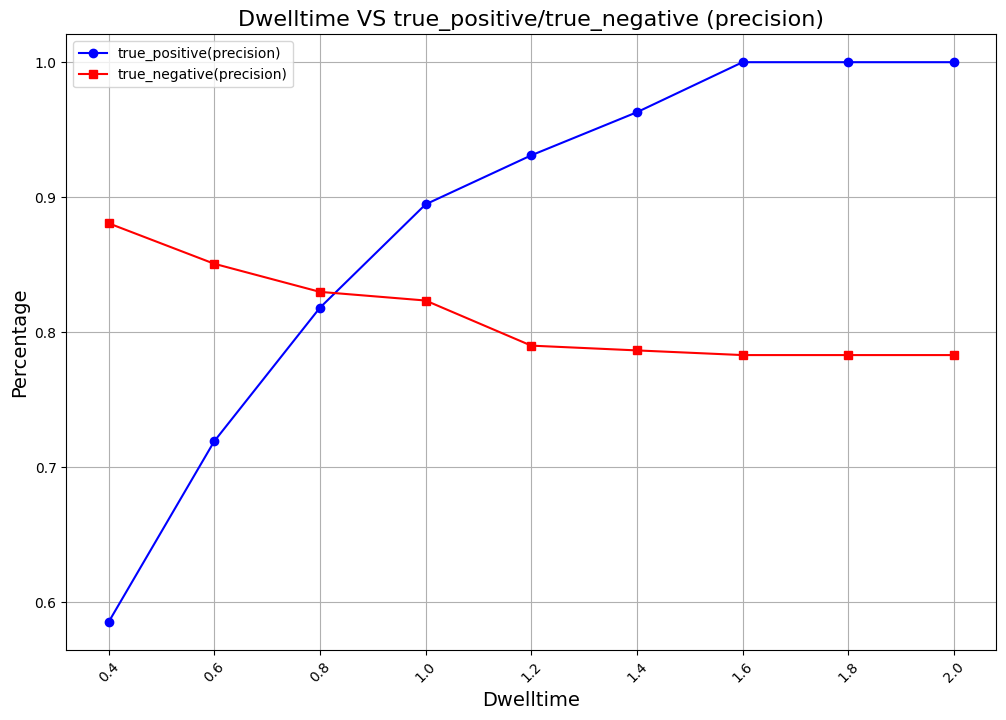

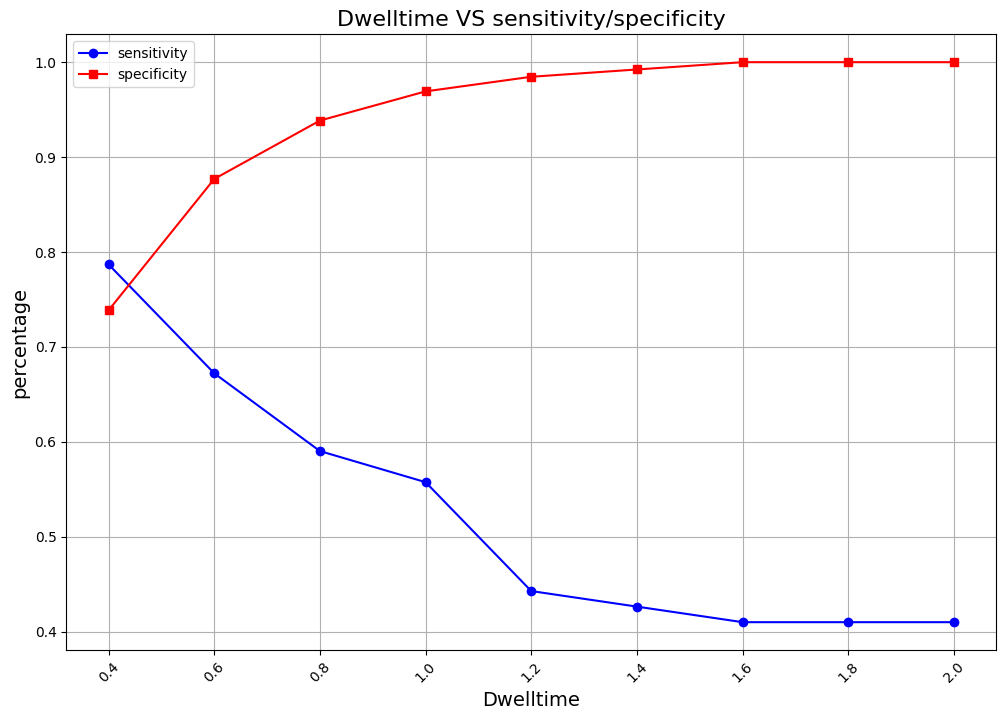

In [5]:
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_positive"], marker='o', linestyle='-', color='b', label='true_positive(precision)')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_negative"], marker='s', linestyle='-', color='r', label='true_negative(precision)')

# Adding titles and labels
plt.title('Dwelltime VS true_positive/true_negative (precision)', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_positive"], marker='o', linestyle='-', color='b', label='sensitivity')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_negative"], marker='s', linestyle='-', color='r', label='specificity')

# Adding titles and labels
plt.title('Dwelltime VS sensitivity/specificity', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

In [6]:
# Specify the file name
file_name = 'eye_data_for_graph.json'

# Save the dictionary to a file
with open(file_name, 'w') as file:
    json.dump(data_for_graph, file)
    
# Save the dictionary to a file
with open(graph_file, 'w') as file:
    json.dump(data_for_graph, file)

In [7]:
data_for_graph

{'Dwelltime': ['0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0'],
 'count_true_positive': [0.5853658536585366,
  0.7192982456140351,
  0.8181818181818182,
  0.8947368421052632,
  0.9310344827586207,
  0.9629629629629629,
  1.0,
  1.0,
  1.0],
 'count_false_positive': [0.7868852459016393,
  0.6721311475409836,
  0.5901639344262295,
  0.5573770491803278,
  0.4426229508196721,
  0.4262295081967213,
  0.4098360655737705,
  0.4098360655737705,
  0.4098360655737705],
 'count_true_negative': [0.8807339449541285,
  0.8507462686567164,
  0.8299319727891157,
  0.8235294117647058,
  0.7901234567901234,
  0.7865853658536586,
  0.7831325301204819,
  0.7831325301204819,
  0.7831325301204819],
 'count_false_negative': [0.7384615384615385,
  0.8769230769230769,
  0.9384615384615385,
  0.9692307692307692,
  0.9846153846153847,
  0.9923076923076923,
  1.0,
  1.0,
  1.0],
 'sum_true_pos': [48, 41, 36, 34, 27, 26, 25, 25, 25],
 'sum_false_pos': [34, 16, 8, 4, 2, 1, 0, 0, 0],
 'sum_true_neg': 